## Compute Global Relative Atmospheric Angular Momentum From CFS Reanalysis Data
###### Inputs: 0.5 deg lat/lon grid data obtained from CFS Reanalysis (CFSR) | Need u-wind at all pressure levels 1000-1 hPa			
###### Outputs: Global Relative Atmospheric Angular Momentum kg*m^2/s
#### Created by: Victor Gensini (Fall 2016)								

In [94]:
#Import neccessary Python libraries (using Python 2.7)
import numpy as np
import math, pygrib
import matplotlib.pyplot as plt

In [95]:
#Declare physical constants
pi = math.pi #Pi
rad = pi/180. #radians
gravity = 9.81 #gravitational acceleration ms^-2
earth_r = 6371220. #Earth's radius in (m)

### Pick a datetime for calculation (valid 1979-2010)

In [96]:
year = 2006 #1979-2010
month = 1 #1-12
day = 22 #1-28, 1-30, 1-31
hour = 12 #0,6,12,18

### Open a CFSR grib2 file
##### Data for this example obtained from: http://rda.ucar.edu/datasets/ds093.0/
##### 6-hrly data also available from: http://nomads.ncdc.noaa.gov/modeldata/cmd_pgbh/

In [97]:
#I've concatenated CFSR 6-hrly data into monthly chunks following a format of <cfsr_YYYYMM.grb2>
data_file = '/home/vgensini/data/CFSR/cfsr_'+str(year)+str('%02d'%month)+'.grb2'

In [98]:
gr = pygrib.open(data_file) #Read CFSR grib2 file containing u-winds at all pressure levels into memory

### Read in all U-component (i.e., zonal) wind values and select your datetime

In [99]:
umsgs = gr.select(name='U component of wind',typeOfLevel='isobaricInhPa', year=year,month=month,day=day, hour=hour)

In [100]:
lats,lons = umsgs[0].latlons() #Read the lat/lon information from the u-wind grib2 message

In [101]:
uwnd = np.zeros((361, 720, 37)) #Could do some fancy dynamic shape finding here
for i,levs in enumerate(umsgs): #CFSR 0.5 data is x-720,y-361,z-37
    uwnd[:,:,i] = levs.values   #Read zonal wind into a 3-D NumPy array

In [102]:
#dp is difference between CFSR pressure levels in Pa | set lowest and highest dp to zero
#Vertical level information can be found here: http://rda.ucar.edu/datasets/ds093.0/#metadata/detailed.html?_do=y
dps=[0.,100.,200.,200.,300.,1000.,1000.,2000.,2000.,3000.,2500.,2500.,2500.,2500.,2500.,2500.,5000.,5000.,5000.,5000.,5000.,5000.,5000.,5000.,5000.,5000.,2500.,2500.,2500.,2500.,2500.,2500.,2500.,2500.,2500.,2500.,0.]
dps = np.tile(np.array(dps),(361,720,1)) #Create a 3-D NumPy array of dp values

### Calculations

In [103]:
UDP = np.multiply(uwnd,dps)
zonalavg_UDP = np.mean(UDP, axis=(1,2)) #Take mean across all longitudes and levels
aam = np.multiply(np.multiply(zonalavg_UDP,np.cos(lats[:,0]*rad)),2.*pi*earth_r**3/gravity) #latitude contribution to AAM

### Result
##### aam represents global atmospheric relative angular momentum by latitude (361 values)

In [104]:
print np.sum(aam) #Sum all latitudes to get total AAM

6.26993224117e+26


### Create a plot

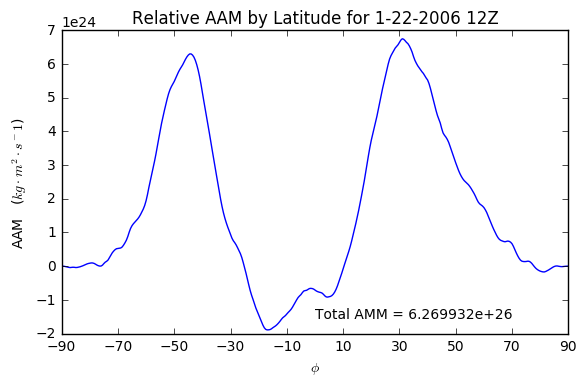

In [109]:
plt.plot(lats[:,0],aam) # plot latitude (x-axis) by global relative aam (y-axis)
plt.title('Relative AAM by Latitude for ' +str(month)+'-'+str(day)+'-'+str(year)+' '+str(hour)+'Z') #Make a title
plt.xlabel(r"$\phi$") #Label x-axis
plt.ylabel('AAM   ('r"$kg \cdot m^2 \cdot s^-1$)") #Label y-axis
plt.xlim(-90,90) #Set limits on the x-axis
plt.xticks(np.arange(-90,110,20)) #Set x-axis ticks every 20 deg
plt.tight_layout() #Make a nice layout
plt.annotate('Total AMM = '+'{:e}'.format(np.sum(aam)),xycoords='figure fraction', xytext=(.5,0.05),xy=(.5,0.05), textcoords='axes fraction') #Annotate total AAM on the plot
plt.show() #Display the plot